In [11]:
!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/

In [12]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.06G/1.06G [00:12<00:00, 157MB/s]
100% 1.06G/1.06G [00:12<00:00, 89.5MB/s]


In [13]:
import zipfile
zip_ref = zipfile.ZipFile("/content/dogs-vs-cats.zip",'r')
zip_ref.extractall('/content')
zip_ref.close()

In [14]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import random
import os
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix
import seaborn as sns
import tensorflow as tf

In [15]:
#Load the Data
train_ds = keras.utils.image_dataset_from_directory(directory = '/content/train',
                                                                  labels = 'inferred',
                                                                  label_mode = 'int',
                                                                  batch_size = 32,
                                                                  image_size = (256,256))
test_ds = keras.utils.image_dataset_from_directory(directory = '/content/test',
                                                                labels = 'inferred',
                                                                label_mode = 'int',
                                                                batch_size = 32,
                                                                image_size = (256,256))

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [16]:
#Normalisation
def process(image,label):
  image = tf.cast(image/255.,tf.float32)
  return image,label
train_ds = train_ds.map(process)
test_ds = test_ds.map(process)

In [17]:
#Model Building
from keras import layers
from keras import models
from keras.layers import Dense,Dropout,Flatten,Conv2D,BatchNormalization,MaxPooling2D
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [18]:
#Model Compilation
model.compile(optimizer='adam',
loss='binary_crossentropy',
metrics=['accuracy'])

In [19]:
#Model Fitting
history = model.fit(train_ds,epochs=10, validation_data = test_ds)

Epoch 1/10
625/625 [==============================] - 75s 104ms/step - loss: 1.1877 - accuracy: 0.5965 - val_loss: 0.6210 - val_accuracy: 0.6366
Epoch 2/10
625/625 [==============================] - 67s 107ms/step - loss: 0.5563 - accuracy: 0.7199 - val_loss: 0.6599 - val_accuracy: 0.7264
Epoch 3/10
625/625 [==============================] - 66s 105ms/step - loss: 0.4602 - accuracy: 0.7872 - val_loss: 0.4566 - val_accuracy: 0.7900
Epoch 4/10
625/625 [==============================] - 66s 104ms/step - loss: 0.3990 - accuracy: 0.8188 - val_loss: 0.5183 - val_accuracy: 0.7326
Epoch 5/10
625/625 [==============================] - 72s 114ms/step - loss: 0.3430 - accuracy: 0.8496 - val_loss: 0.4597 - val_accuracy: 0.7884
Epoch 6/10
625/625 [==============================] - 67s 106ms/step - loss: 0.2722 - accuracy: 0.8833 - val_loss: 0.5186 - val_accuracy: 0.7540
Epoch 7/10
625/625 [==============================] - 65s 103ms/step - loss: 0.2024 - accuracy: 0.9198 - val_loss: 0.6045 - val_ac

In [20]:
#Model Validation
test_loss, test_acc = model.evaluate(test_ds)
test_acc

157/157 [==============================] - 8s 52ms/step - loss: 0.7536 - accuracy: 0.8240


0.8240000009536743

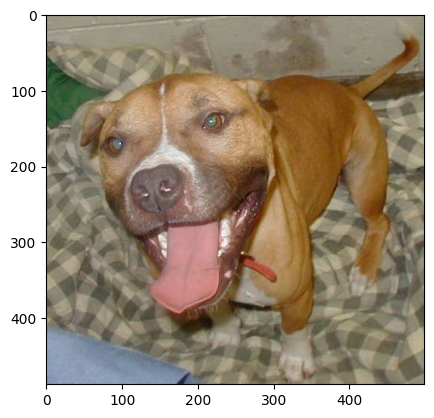

In [25]:
#Choosing a random image from the test data
from matplotlib.image import imread
database_path = '/content/random sample '
image_file = [os.path.join(database_path,file) for file in os.listdir(database_path) if file.endswith(('.jpg'))]

random_image = random.choice(image_file)

img = imread(random_image)
plt.imshow(img)
plt.show()

In [26]:
#Reshaping the Image
import cv2
img = cv2.resize(img,(256,256))
img1 = img.reshape(1,256,256,3)

In [27]:
#Model Prediction
prediction = model.predict(img1)
class_labels = ['Cat','Dog']
predicted_class = class_labels[int(np.round(prediction[0][0]))]
print(f'The image is predicted to be a {predicted_class} with confidence:{prediction}')

1/1 [==============================] - 0s 17ms/step
The image is predicted to be a Dog with confidence:[[1.]]
